In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# rOT

In [2]:
features = pd.read_csv('rOT/features.csv').to_numpy()
labels = pd.read_csv('rOT/labels.csv').to_numpy()

In [9]:
classes = np.unique(labels)
# colors = {'24hrs meloxicam':'r', '24hrs saline':'g', '4hrs carrageenan':'b', 'baseline':'c', 'baseline meloxicam':'k'}
colors = {'24hrs meloxicam':"#58d68d", '24hrs saline':"#f7dc6f", '4hrs carrageenan':"#e59866", 'baseline':"#5d6d7e", 'baseline meloxicam':"#d2b4de"}


meloxicam24h = mpatches.Patch(color="#58d68d", label='24hrs meloxicam')
saline24h = mpatches.Patch(color="#f7dc6f", label='24hrs saline')
carrageenan = mpatches.Patch(color="#e59866", label='4hrs carrageenan')
baseline = mpatches.Patch(color="#5d6d7e", label='baseline')
baselineMeloxicam =  mpatches.Patch(color="#d2b4de", label='baseline meloxicam')

In [10]:

def reduce_dimensions(features,perplexity):
    num_dimensions = 2  # final num dimensions (2D, 3D, etc)

    # extract the words & their vectors, as numpy arrays
    vectors = features
    # reduce using t-SNE
    tsne = TSNE(n_components=num_dimensions,perplexity=perplexity, random_state=0)
    vectors = tsne.fit_transform(vectors)
    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]
    return x_vals, y_vals


def plot_with_matplotlib(x_vals, y_vals, labels, axis, perplexity):
    import random

    random.seed(0)
    c = []
    for label in labels:
        if label[0] in colors:
            c.append(colors[label[0]])
    axis.scatter(x_vals, y_vals, c=c)
    axis.set_title("Perplexity=%d" % perplexity)

In [23]:

def reduce_dimensions_3D(model,perplexity):
    num_dimensions = 3  # final num dimensions (2D, 3D, etc)

    # extract the words & their vectors, as numpy arrays
    vectors = features
    # reduce using t-SNE
    tsne = TSNE(n_components=num_dimensions,perplexity=perplexity, random_state=0)
    vectors = tsne.fit_transform(vectors)
    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]
    z_vals = [v[2] for v in vectors]
    return x_vals, y_vals, z_vals


def plot_with_matplotlib_3D(x_vals, y_vals, z_vals, labels, axis, perplexity):
    import random

    random.seed(0)
    c = []
    for label in labels:
        if label[0] in colors:
            c.append(colors[label[0]])
    axis.scatter(x_vals, y_vals, z_vals, c=c)
    axis.set_title("Perplexity=%d" % perplexity, fontsize=15)

    axis.scatter(x_vals, y_vals, z_vals, c=c)

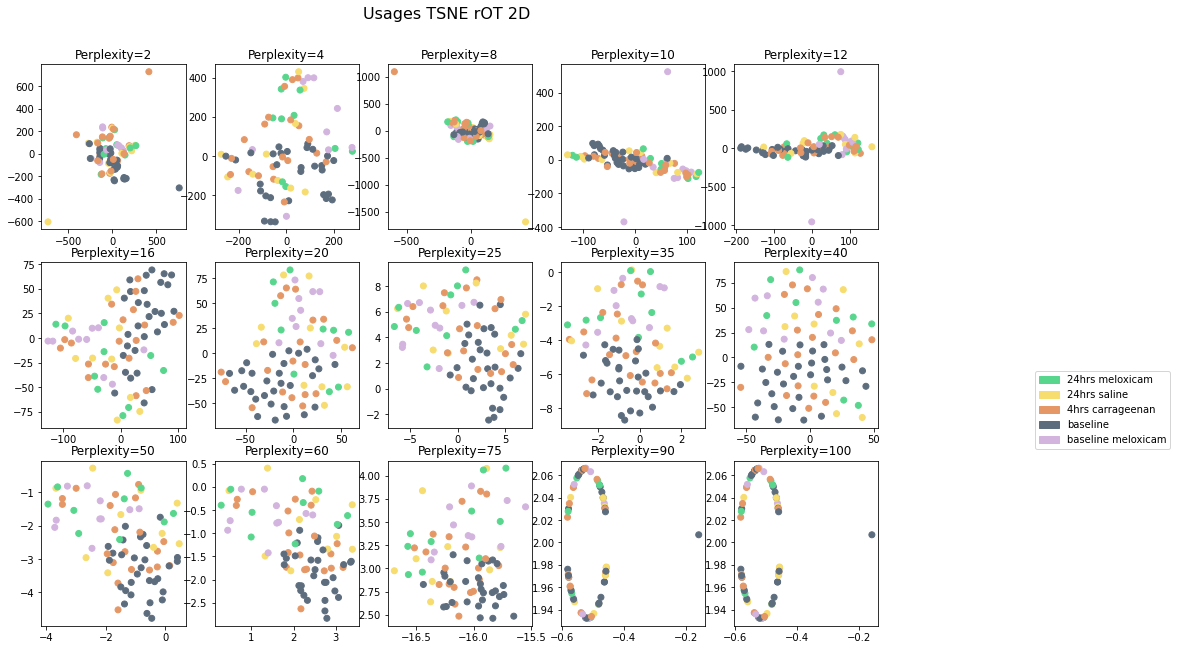

In [19]:
(fig, subplots) = plt.subplots(3,5, figsize = (15,8))
perplexities = [2,4,8,10,12,16,20,25,35,40,50,60,75,90,100]
len(perplexities)

for ax, perplexity in zip((fig.axes),perplexities):
    x_vals, y_vals = reduce_dimensions(features, perplexity)
    plot_with_matplotlib(x_vals, y_vals, labels, ax, perplexity)
    
title = fig.suptitle('Usages TSNE rOT 2D',x=0.5, y=1.2, size='16')
fig.subplots_adjust(top=1.1)
legend = fig.legend(handles=[meloxicam24h,saline24h,carrageenan,baseline,baselineMeloxicam],bbox_to_anchor=(1.04,0.5), loc="center left")
fig.savefig('Usages_TSNE_rOT_2D.png',bbox_extra_artists=(legend,title), bbox_inches='tight')

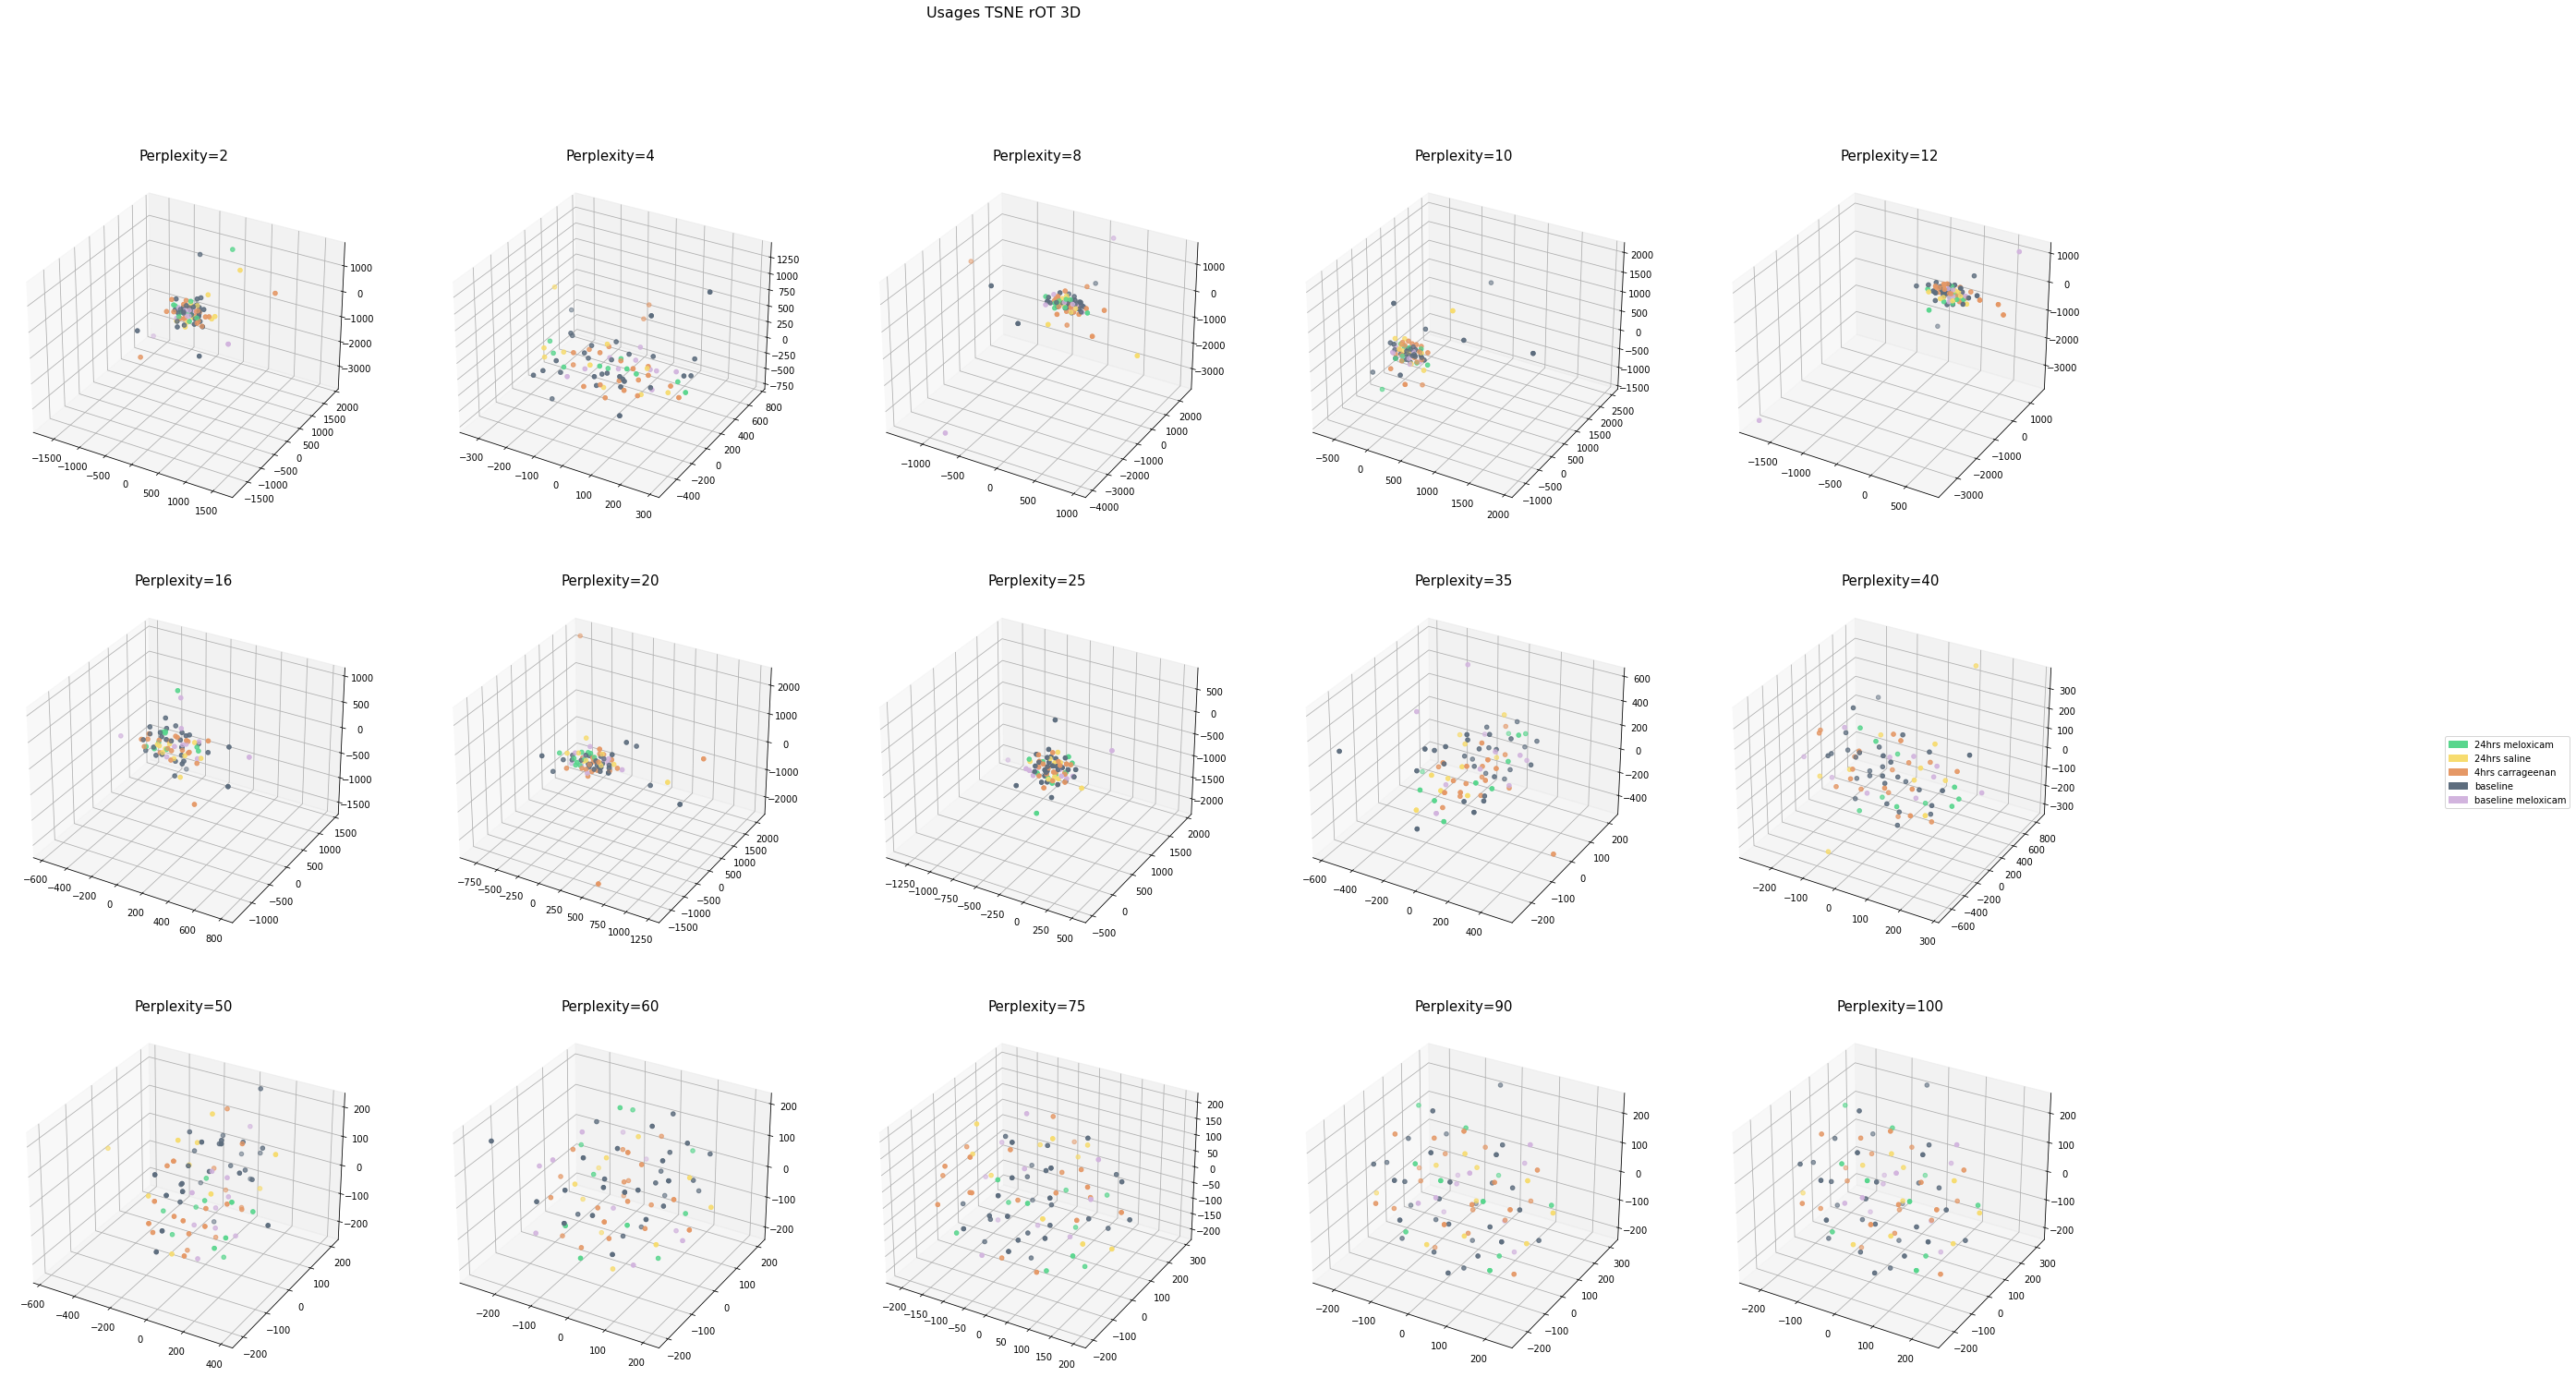

In [24]:
fig = plt.figure(figsize=(40,24))
perplexities = [2,4,8,10,12,16,20,25,35,40,50,60,75,90,100]
len(perplexities)

for i, perplexity in enumerate(perplexities):
    ax = fig.add_subplot(3, 5, i+1, projection='3d')
    x_vals, y_vals, z_vals = reduce_dimensions_3D(features, perplexity)
    plot_with_matplotlib_3D(x_vals, y_vals, z_vals, labels, ax, perplexity)

title = fig.suptitle('Usages TSNE rOT 3D', size='16')
fig.subplots_adjust(top=0.88)
legend = fig.legend(handles=[meloxicam24h,saline24h,carrageenan,baseline,baselineMeloxicam],bbox_to_anchor=(1.04,0.5), loc="center left")
fig.savefig('Usages_TSNE_rOT_3D.png',bbox_extra_artists=(legend,title), bbox_inches='tight')

# rST

In [25]:
features = pd.read_csv('rST/features.csv').to_numpy()
labels = pd.read_csv('rST/labels.csv').to_numpy()

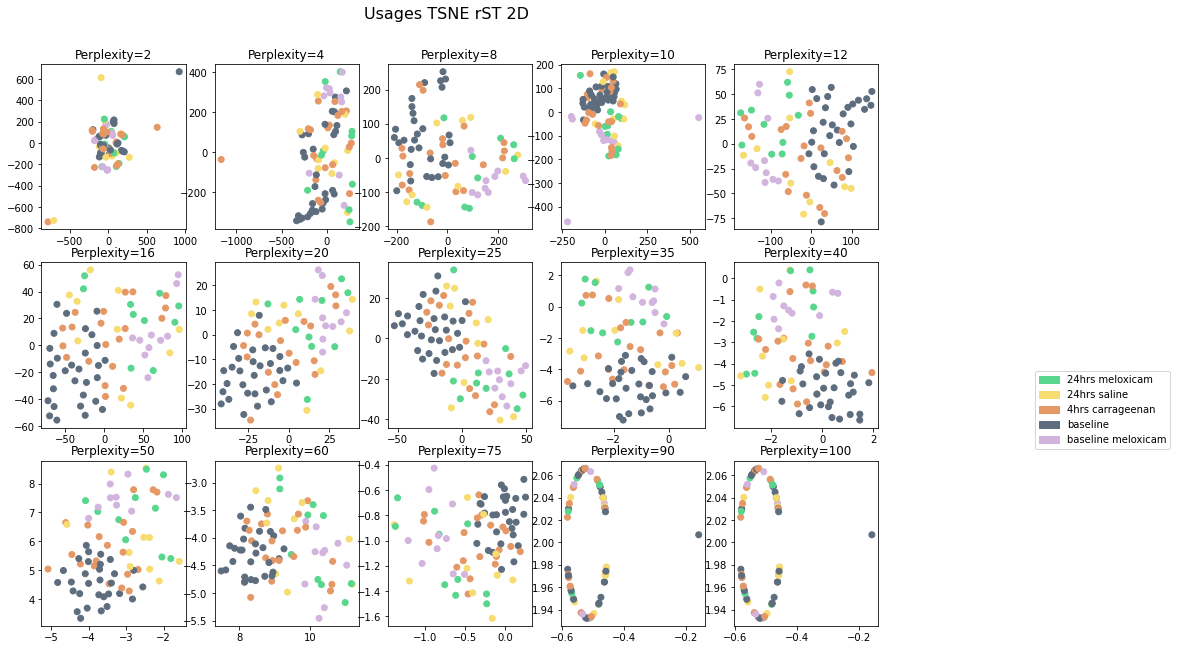

In [26]:
(fig, subplots) = plt.subplots(3,5, figsize = (15,8))
perplexities = [2,4,8,10,12,16,20,25,35,40,50,60,75,90,100]
len(perplexities)

for ax, perplexity in zip((fig.axes),perplexities):
    x_vals, y_vals = reduce_dimensions(features, perplexity)
    plot_with_matplotlib(x_vals, y_vals, labels, ax, perplexity)

title = fig.suptitle('Usages TSNE rST 2D',x=0.5, y=1.2, size='16')
fig.subplots_adjust(top=1.1)
legend = fig.legend(handles=[meloxicam24h,saline24h,carrageenan,baseline,baselineMeloxicam],bbox_to_anchor=(1.04,0.5), loc="center left")
fig.savefig('Usages_TSNE_rST_2D.png',bbox_extra_artists=(legend,title), bbox_inches='tight')

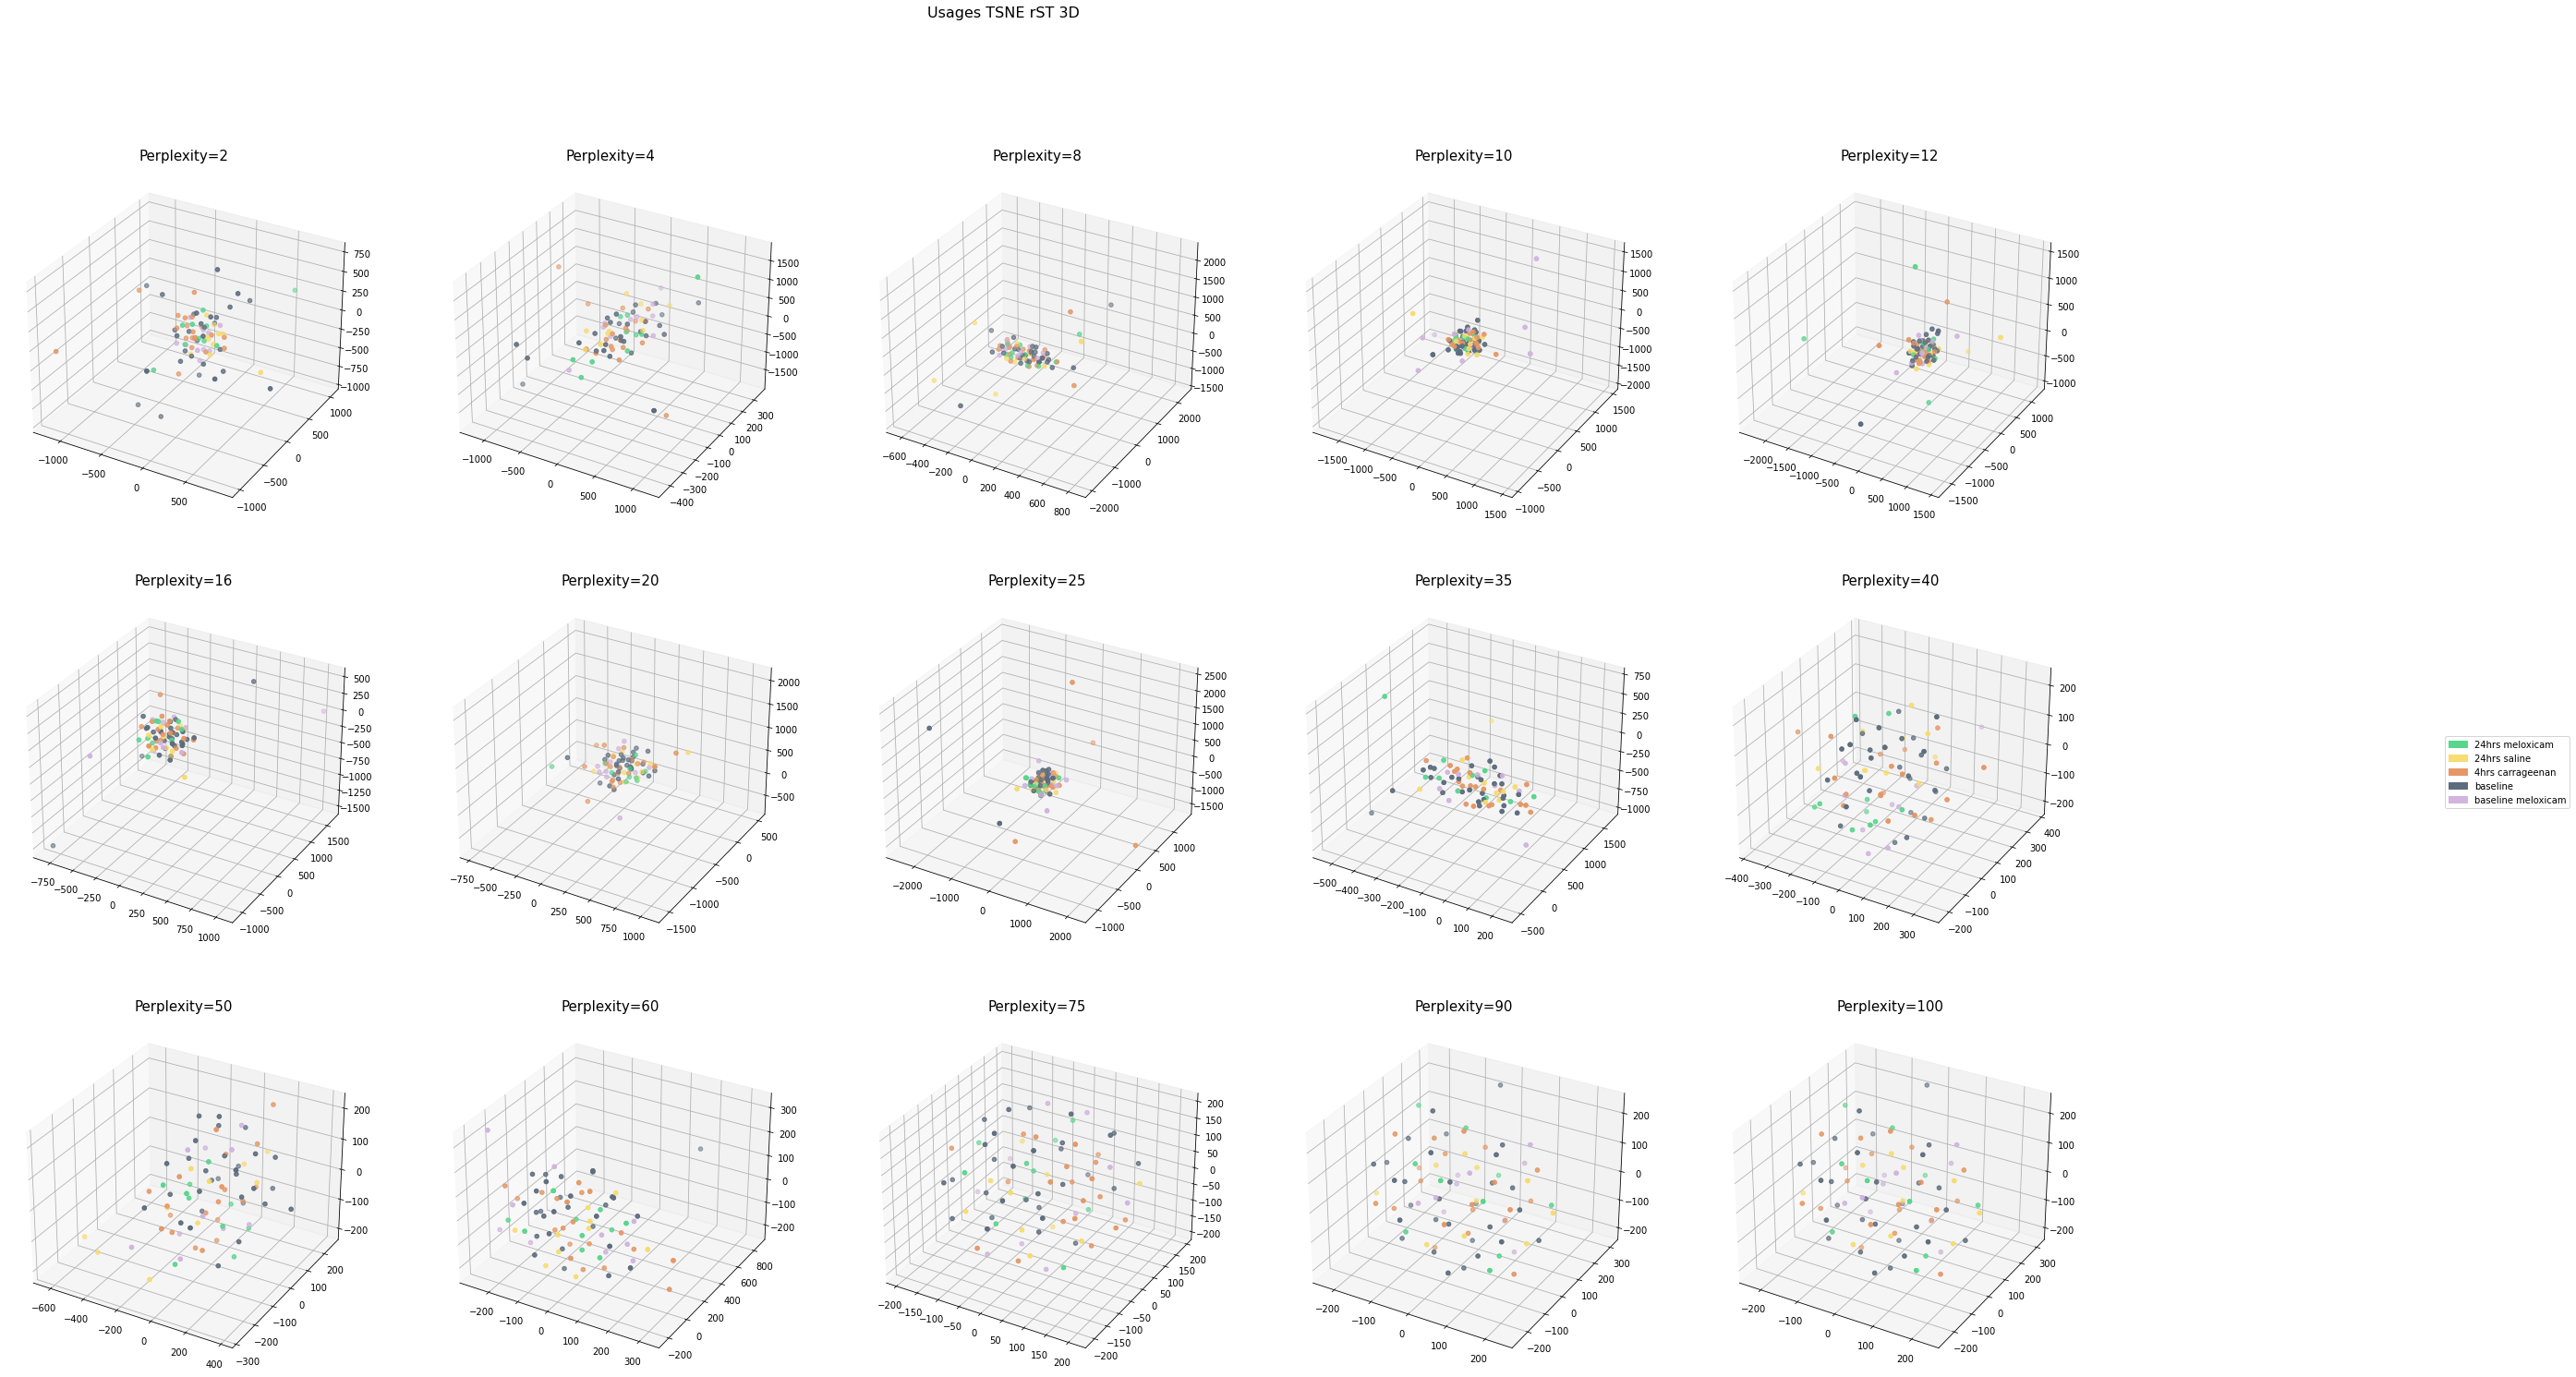

In [27]:
fig = plt.figure(figsize=(40,24))
perplexities = [2,4,8,10,12,16,20,25,35,40,50,60,75,90,100]
len(perplexities)

for i, perplexity in enumerate(perplexities):
    ax = fig.add_subplot(3, 5, i+1, projection='3d')
    x_vals, y_vals, z_vals = reduce_dimensions_3D(features, perplexity)
    plot_with_matplotlib_3D(x_vals, y_vals, z_vals, labels, ax, perplexity)

title = fig.suptitle('Usages TSNE rST 3D', size='16')
fig.subplots_adjust(top=0.88)
legend = fig.legend(handles=[meloxicam24h,saline24h,carrageenan,baseline,baselineMeloxicam],bbox_to_anchor=(1.04,0.5), loc="center left")
fig.savefig('Usages_TSNE_rST_3D.png',bbox_extra_artists=(legend,title), bbox_inches='tight')

# gST

In [29]:
features = pd.read_csv('gST/features.csv').to_numpy()
labels = pd.read_csv('gST/labels.csv').to_numpy()

ValueError: could not convert string to float: '[0.03333333 0.01421569 0.02794118 0.03333333 0.01813725 0.02647059\n 0.03529412 0.02696078 0.01617647 0.025      0.01372549 0.02892157\n 0.02352941 0.02990196 0.02598039 0.02303922 0.02058824 0.02941176\n 0.02254902 0.00735294 0.01666667 0.01813725 0.01519608 0.00882353\n 0.00980392 0.00539216 0.01764706 0.01078431 0.025      0.01323529\n 0.0127451  0.01323529 0.00980392 0.01813725 0.0127451  0.01176471\n 0.00784314 0.01764706 0.00833333 0.02401961 0.01617647 0.00637255\n 0.01127451 0.00343137 0.01911765 0.00539216 0.01078431 0.01421569\n 0.00245098 0.01519608 0.00784314 0.01911765 0.00931373 0.00882353\n 0.00833333 0.00147059 0.01078431 0.00539216 0.00833333 0.00539216\n 0.00147059 0.00588235 0.00343137 0.01078431 0.00588235 0.00294118\n 0.00294118 0.00637255 0.00147059 0.00686275 0.00392157]'

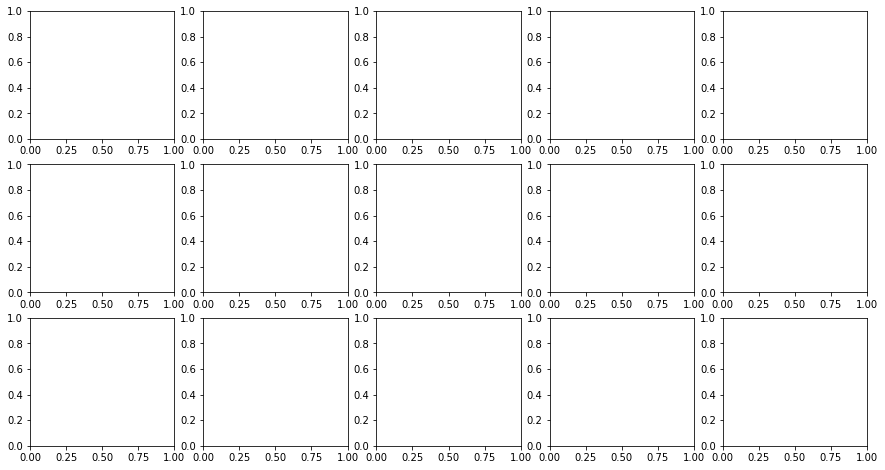

In [30]:
(fig, subplots) = plt.subplots(3,5, figsize = (15,8))
perplexities = [2,4,8,10,12,16,20,25,35,40,50,60,75,90,100]
len(perplexities)

for ax, perplexity in zip((fig.axes),perplexities):
    x_vals, y_vals = reduce_dimensions(features, perplexity)
    plot_with_matplotlib(x_vals, y_vals, labels, ax, perplexity)

In [17]:
fig = plt.figure(figsize=(40,24))
perplexities = [2,4,8,10,12,16,20,25,35,40,50,60,75,90,100]
len(perplexities)

for i, perplexity in enumerate(perplexities):
    ax = fig.add_subplot(3, 5, i+1, projection='3d')
    x_vals, y_vals, z_vals = reduce_dimensions_3D(features, perplexity)
    plot_with_matplotlib_3D(x_vals, y_vals, z_vals, labels, ax, perplexity)

# gOT

In [ ]:
features = pd.read_csv('gOT/features.csv').to_numpy()
labels = pd.read_csv('gOT/labels.csv').to_numpy()

In [18]:
(fig, subplots) = plt.subplots(3,5, figsize = (15,8))
perplexities = [2,4,8,10,12,16,20,25,35,40,50,60,75,90,100]
len(perplexities)

for ax, perplexity in zip((fig.axes),perplexities):
    x_vals, y_vals = reduce_dimensions(features, perplexity)
    plot_with_matplotlib(x_vals, y_vals, labels, ax, perplexity)

In [19]:
fig = plt.figure(figsize=(40,24))
perplexities = [2,4,8,10,12,16,20,25,35,40,50,60,75,90,100]
len(perplexities)

for i, perplexity in enumerate(perplexities):
    ax = fig.add_subplot(3, 5, i+1, projection='3d')
    x_vals, y_vals, z_vals = reduce_dimensions_3D(features, perplexity)
    plot_with_matplotlib_3D(x_vals, y_vals, z_vals, labels, ax, perplexity)